 # Machine Learning LAB 1 (course 2020/21, P. Zanuttigh, M. Toldo) 

The notebook contains some simple tasks to be performed about classification and regression. Complete all the required code sections and answer to all the questions.

## 1) Classification of NBA players role

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!

### Place your name and ID number. Also recall to save the file as Surname_Name_LAB1.ipynb

Student name: Lorenzo Domenichetti <br>
ID Number: 2011653

### Dataset description

We will be working with a dataset of NBA basketball players data (you can get from https://www.kaggle.com/jacobbaruch/nba-player-of-the-week the full dataset).

The provided data is a subset of the Kaggle dataset containing the players that have the role of Center and of Point Guard. For each player the dataset contains 3 features, the height, the weight and the age.

From Wikipedia (if you are not a basketball fan!!):

The Center (C), also known as the five, or the big man, is one of the five positions in a regular basketball game. The center is normally the tallest player on the team, and often has a great deal of strength and body mass as well. In the NBA, the center is usually 6' 10" (2.08 m) or taller and usually weighs 240 lbs (109 kg) or more. 

Point Guards (PG, a.k.a. as "play maker") are expected to run the team's offense by controlling the ball and making sure that it gets to the right players at the right time. In the NBA, point guards are usually about 6' 3" (1.93 m) or shorter, and average about 6' 2" (1.88 m). Having above-average size (height, muscle) is considered advantageous, although size is secondary to situational awareness, speed, quickness, and ball handling skills. Shorter players tend to be better dribblers since they are closer to the floor, and thus have better control of the ball while dribbling. 


As it is clear from the description, the height and weight of the player are good hints to predict their role and in this lab we will exploit this features to estimate the role.


### Three features are considered for this dataset:


1) Height in cm

2) Weight in kg

3) Age in years

We first import all the packages that are needed.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

# Perceptron
Firstly we will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed (you can use your ID (matricola) or any other number!).

In [2]:
IDnumber = 2011653

np.random.seed(IDnumber)

Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 70% training 30% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [3]:
####  ---LOADING THE DATASET AS A NP.ARRAY---  ####
filename = 'data/NBA.csv'
NBA = csv.reader(open(filename, newline=''), delimiter=',')

header = next(NBA) #skip first line = header
#print(header)

dataset = list(NBA)
for i in range(len(dataset)):
    dataset[i] = [int(x) for x in dataset[i]]  
dataset = np.array(dataset)

X = dataset[:,1:4] #columns 1,2,3 contain the features
Y = dataset[:,0]  # column 0: labels


####  ---SETTING LABELS TO -1,1 (PERCEPTRON IMPLEMENTATION REQUEST)--  ####
Y = Y*2-1 
m = dataset.shape[0]
print(f"Dataset size: {m}")


####  ---SHUFFLING THE DATASET---  ####
permutation = np.random.permutation(m) # random permurtation

X = X[permutation]
Y = Y[permutation]

print(f"Dataset shape: {dataset.shape}")

Dataset size: 260
Dataset shape: (260, 4)


We are going to classify class "1" (Center) vs class "-1" (Point Guard)

B) **TO DO** Divide the data into training set and test set (70% of the data in the first set, 30% in the second one)

In [4]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.


####  ---DIVIDING DATA INTO TRAINING AND TEST SET---  ####
#m_training needs to be the number of samples in the training set
m_training = int(X.shape[0]*0.7)

#m_test needs to be the number of samples in the test set
m_test = int(X.shape[0]*0.3)


####  ---DEFINING A STANDARD FUNCTION FOR SPLITTING DATA IN TEST AND TRAIN SET---  ####
####  ---DEFAULT VALUES ARE SET AT 0.7 AND 10, AS REQUIRED---  ####
def split(X,Y, frac = 0.7, leastNum = 10): #X: train data
                                           #Y: labels (MUST be -1,1)
                                           #frac: train fraction of dataset
                                           #leastNum: min number of -1/1 in train/test set
    do = True
    m = int(X.shape[0]*frac) 
    k = dataset.shape[0]
    while(do):
        permutation = np.random.permutation(k) # random permurtation
        X = X[permutation]
        Y = Y[permutation]

        X_train=X[:m,:] #PICKING ONLY FIRST m SAMPLES
        X_test=X[m:,:]  #PICKING LAST m SAMPLES
        Y_train=Y[:m]
        Y_test=Y[m:]

        x = np.sum(Y_train) #there are m entries in Y_train. In order to have at least "leastNum" 
                            #1 or -1, I need to have a sum which stays in between [-m+10, m-10]
                            
        if x<(m-leastNum) and x>(leastNum-m):
            do = False
        else:
            do = True
    return X_train, Y_train, X_test, Y_test #returning 4 arrays with the desired properties.


X_training, Y_training, X_test, Y_test = split(X,Y) #X_training = instances for training set
                                                    #Y_training = labels for the training set
                                                    #X_test = instances for test set
                                                    #Y_test = labels for the test set

           
####  ---CHECKING OUTPUT RESULTS---  ####
print(f"Training labels: \n {Y_training}") #to make sure that Y_training contains both 1 and -1
print(f"Number of element in test set: {m_test}")

print(f"Shape of training set: {X_training.shape}")
print(f"Shape of test set: {X_test.shape}")

Training labels: 
 [ 1 -1  1  1  1  1  1  1 -1  1 -1  1 -1  1  1  1  1 -1 -1  1  1 -1  1 -1
  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1  1  1 -1 -1 -1  1  1 -1
 -1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1  1  1 -1
  1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1  1 -1  1 -1  1  1  1 -1 -1  1  1  1
 -1 -1  1  1 -1  1 -1 -1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1
  1  1  1 -1 -1 -1 -1  1  1 -1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1  1
 -1  1  1  1  1  1 -1  1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1  1  1 -1 -1
  1  1  1 -1  1 -1  1  1  1  1  1 -1 -1 -1]
Number of element in test set: 78
Shape of training set: (182, 3)
Shape of test set: (78, 3)


We add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [5]:
####  ---SHIFTING TO HOMOGENEOUS COORDINATES---  ####
X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((m_test,1)),X_test))
print(f"Shape of training set: {X_training.shape}")  #(should be (previous, previous+1))

Shape of training set: (182, 4)


**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of misclassified samples for the best model

In [6]:
####  ---DEFINING FUNCION TO UPDATE W FOLLOWING PERCEPTRON'S RULE---  ####
def perceptron_update(current_w, x, y):
    return current_w +y*x

####  ---DEFINING FUNCION TO IMPLEMENT PERCEPTRON PATH---  ####
def perceptron(X, Y, max_num_iterations):
    
    #init the algorith with w=0, use a best_w variable to keep track of the best solution
    curr_w = np.array([0,0,0,0])
    best_w = np.array([0,0,0,0])
    num_samples = X.shape[0]
    best_error = X.shape[0] #"high value". Will be overwritten with the best error during while.
    
    index_misclassified = 0 #will be overwritten: DO NOT dafault set them at -1 
    num_misclassified = 0
    
    
    num_iter = 1
    shuf_index = np.arange(num_samples)
    #main loop continue until all samples correctly classified or max # iterations reached
    while ((index_misclassified != -1) and (num_iter < max_num_iterations)):
        index_misclassified = -1
        num_misclassified = 0
        
        #random permutation of the misclassified sample
        np.random.shuffle(shuf_index)
        
        for i in shuf_index:  
            if (Y[i]*np.dot(curr_w,X[i])<=0):  #misclassified sample? ->
                num_misclassified += 1      #count misclassified samples
                index_misclassified = i     #storing one index
            
        if (best_error>num_misclassified): #keeping track of best solution
            best_error = np.copy(num_misclassified)
            best_w = np.copy(curr_w)
    
        num_iter += 1 #adding always 1 at iteration count
        
        #Updating curr_w using a (random) misclassified sample
        curr_w = perceptron_update(curr_w, X[index_misclassified], Y[index_misclassified])
    
    best_error = best_error/num_samples
    
    return best_w, best_error

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [7]:
####  ---RUNNING PERCEPTRON FOR 100 ITERATIONS---  ####
w_found, error = perceptron(X_training,Y_training, 100)
print("Training Error of perpceptron (100 iterations): " + str(error))
print(w_found)

Training Error of perpceptron (100 iterations): 0.08241758241758242
[  -3. -272.  578.  -79.]


**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [8]:
####  ---PREDICTION ON TEST SET WITH w_found---  ####
num_errors = 0
# Computing errors number
for i in np.arange(X_test.shape[0]):  
    if (Y_test[i]*np.dot(w_found,X_test[i])<=0): #misclassified sample? ->
        num_errors += 1                                

true_loss_estimate = num_errors/m_test  # error rate on the test set
print("Test Error of perceptron (100 iterations): " + str(true_loss_estimate))

Test Error of perceptron (100 iterations): 0.0641025641025641


**TO DO**

 **[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples? Explain what you observe.
 
 
The train error is smaller than the test one (at least, at first run). It may let us think to some underfitting error, but I would rather address this to some points considerable as outliers that belong (randomly) to one set or the other. In fact, running multiple times the algorithm (so reshuffling the dataset), we can see both errors fluctuate a bit and switch their positions ( i.e. test error both smaller and bigger than train one). The true error we get, anyway, is an estimate of how well out predictor works on a sample taken from the same distribution as the training ones.


**TO DO** 

Copy the code from the last 2 cells above in the cell below and repeat the training with 3000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [9]:
####  ---RUNNING PERCEPTRON FOR 3000 ITERATIONS---  ####
w_3000, error_3000 = perceptron(X_training,Y_training, 3000)
print("Training Error of perpceptron (3000 iterations): " + str(error_3000))

num_errors_3000 = 0
# Computing errors number
for i in np.arange(X_test.shape[0]):  
    if (Y_test[i]*np.dot(w_3000,X_test[i])<=0):  #misclassified sample? ->
        num_errors_3000 += 1                                

true_loss_estimate_3000 = num_errors_3000/m_test  # error rate on the test set
print("Test Error of perpceptron (3000 iterations): " + str(true_loss_estimate_3000))

print(w_3000)
print(w_found) #actually, different vectors provide the same error on the test set/training set. 

Training Error of perpceptron (3000 iterations): 0.08241758241758242
Test Error of perpceptron (3000 iterations): 0.0641025641025641
[  -4. -266.  559.  -76.]
[  -3. -272.  578.  -79.]


**TO DO** 

**[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples) when running for a larger number of iterations ? Explain what you observe and compare with the previous case. [Write the answer in this cell]

**ANSWER QUESTION 2**

The result after 3000 iterations is stable, while the error on the previous run varied between different values. Anyway, it seems like the perceptron in both cases does not manage to reach the perfect result, and reaches 12 as the minimum number of misclassified samples after "n_iter" iterations. 

Anyway, running the perceptron for 3000 iterations instead of just 100 gives us a better solutions overall. While the former solution, as said, is quite stable, the latter ones ranges between 0.15 and 0.06 (few iterations checked), providing very different predictors.
Moreover, the algorithm in some cases outputs the same results. This fact could be linked to the small number of samples in both sets.

# Logistic Regression
Now we use logistic regression, exploiting the implementation in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [10]:
####  ---IMPORTING AND SHUFFLING DATA. AS BEFORE---  ####
filename = 'data/NBA.csv'
NBA = csv.reader(open(filename, newline=''), delimiter=',')

header = next(NBA)
print(header)

dataset = list(NBA)
for i in range(len(dataset)):
    dataset[i] = [int(x) for x in dataset[i]]
    
dataset = np.asarray(dataset)

X = dataset[:,1:]
Y = dataset[:,0]

Y = Y*2-1  # set labels to -1, 1

m = dataset.shape[0]
permutation = np.random.permutation(m)

X = X[permutation]
Y = Y[permutation]

['Position', 'Height cm', 'kg', 'Age']


**TO DO** As for the previous part, divide the data into training and test (70%-30%) and add a 1 as first component to each sample.

In [11]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed. 


####  ---DIVIDING DATA INTO TRAINING AND TEST SET---  ####
m_training = int(X.shape[0]*0.7)
#print(m_training)

#m_test needs to be the number of samples in the test set
m_test = int(X.shape[0]*0.3)
#print(m_test)

X_training, Y_training, X_test, Y_test = split(X,Y) #X_training = instances for training set
                                                    #Y_training = labels for the training set
                                                    #X_test = instances for test set
                                                    #Y_test = labels for the test set


####  ---CHECKING OUTPUT RESULTS---  ####
print(f"Training labels: \n {Y_training}") #to make sure that Y_training contains both 1 and -1

print(f"Shape of training set: {X_training.shape}")
print(f"Shape of test set: {X_test.shape}")

####  ---SHIFTING TO HOMOGENEOUS COORDINATES (np.hstack)---  ####
X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((m_test,1)),X_test))
print(f"Shape of training set after stack: {X_training.shape}")

Training labels: 
 [-1 -1 -1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1  1  1  1 -1
  1 -1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1  1  1
 -1 -1  1  1  1 -1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1
 -1  1 -1 -1  1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1 -1 -1  1
  1  1 -1  1  1 -1 -1  1  1  1  1  1 -1  1 -1  1  1  1  1 -1 -1  1 -1 -1
 -1  1  1  1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1
  1 -1 -1  1  1  1 -1  1 -1 -1 -1  1 -1 -1]
Shape of training set: (182, 3)
Shape of test set: (78, 3)
Shape of training set after stack: (182, 4)


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** 

Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples misclassified in the training set and in the test set.

In [12]:
####  ---DEFINING A LOGISTIC REGRESSION MODEL---  ####
logreg = linear_model.LogisticRegression(C=1e5) #a large C disables regularization


####  ---LEARNING FROM TRAINING SET---  ####
logreg.fit(X_training,Y_training)

####  --- COUNTING ERRORS ON TRAIN SET PREDICTIONS---  ####
error_rate_training = 0

for i in np.arange( m_training ): #Counting errors
    if (Y_training[i]!=logreg.predict(X_training)[i]): error_rate_training+=1


####  --- COUNTING ERRORS ON TEST SET PREDICTIONS---  ####
error_rate_test = 0

for i in np.arange( m_test ):
    if (Y_test[i]!=logreg.predict(X_test)[i]): error_rate_test+=1

####  ---CHECKING OUTPUT---  ####
error_rate_training/=m_training
print("Error rate on training set: "+str(error_rate_training))

error_rate_test/=m_test
print("Error rate on test set: "+str(error_rate_test))

Error rate on training set: 0.06043956043956044
Error rate on test set: 0.0641025641025641


**TO DO** 

Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. 

Which features are you going to select ? 

Surely height and weight, as long as age does not determine whether a player is a C or a PG

In [13]:
####  ---REDICING FEATURES TO 2, SO WE ARE ABLE TO PLOT RESULTS---  ####
features_list = ['height', 'weight', 'age']
labels_list = ['Center', 'Point guard']

####  ---SELECTING FEATURES---  ####
index_feature1 = 0 #Height
index_feature2 = 1 #Weight (age of course is not very meaningful)
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]


X_reduced = X[:,features] #Picking only features requires
print(f"Shape of reduced set: {X_reduced.shape}")

####  ---SPLITTING--  ####
X_training, Y_training, X_test, Y_test = split(X_reduced,Y) #X_training = instances for training set
                                                    #Y_training = labels for the training set
                                                    #X_test = instances for test set
                                                    #Y_test = labels for the test set
####  ---CHECKING RESULTS---  ####
print(f"Training labels: \n {Y_training}") #to make sure that Y_training contains both 1 and -1

print(f"Shape of training set: {X_training.shape}")
print(f"Shape of test set: {X_test.shape}")

Shape of reduced set: (260, 2)
Training labels: 
 [-1  1 -1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1  1  1 -1  1 -1 -1  1  1  1
 -1 -1 -1  1 -1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1 -1 -1 -1  1
 -1  1  1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1 -1  1
  1  1  1 -1 -1 -1  1  1  1 -1  1 -1  1  1  1 -1 -1  1  1  1 -1  1  1 -1
 -1 -1  1 -1 -1  1  1 -1 -1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1  1
 -1  1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1  1  1 -1  1  1 -1  1  1  1  1
  1 -1 -1  1  1 -1 -1  1 -1  1  1  1  1  1 -1  1 -1  1 -1  1 -1 -1  1 -1
 -1 -1  1 -1  1  1  1 -1  1  1 -1 -1 -1  1]
Shape of training set: (182, 2)
Shape of test set: (78, 2)


Now learn a model using the training data and measure the performances.

In [14]:
####  ---DEFINING AND TRAINING THE MODEL-  ####
logreg = linear_model.LogisticRegression(C=1e5) #a large C disables regularization
logreg.fit(X_training,Y_training)

####  ---COUNTING ERRORS ON TEST SET---  ####
error_rate_test = 0
for i in np.arange( m_test ):
    if (Y_test[i]!=logreg.predict(X_test)[i]):error_rate_test+=1
        
####  ---CHECKING OUTPUT---  ####
error_rate_test/=m_test
print("Error rate on test set: " + str(error_rate_test))

Error rate on test set: 0.08974358974358974


**TO DO** [Answer the following] Which features did you select and why ? Compare the perfromances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

**ANSWER QUESTION 3**

Surely height and weight, as long as age does not determine whether a player is a C or a PG. In fact, while comparing these one I get a 0.06 error, if I compare for exaple height and age I get a 0.28 percentage error ( far larger! ).

As expected, the age does not affect the predictors, as I get a similar error as the previous one even without a feature (which we can say it's not relevant).

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

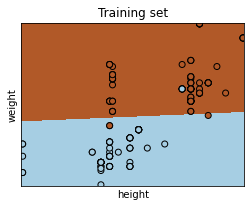

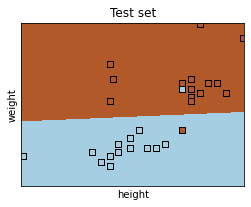

In [15]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation
h = .02  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()

# 2) Linear Regression on the Boston House Price dataset

Dataset description: <br>
The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details about the house and its neighborhood.

The dataset contains a total of 500 observations, which relate 13 input features to an output variable (house price).

The variable names are as follows:

CRIM: per capita crime rate by town.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of nonretail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: nitric oxides concentration (parts per 10 million).

RM: average number of rooms per dwelling.

AGE: proportion of owner-occupied units built prior to 1940.

DIS: weighted distances to five Boston employment centers.

RAD: index of accessibility to radial highways.

TAX: full-value property-tax rate per $10,000.

PTRATIO: pupil-teacher ratio by town.

B: 1000*(Bk – 0.63)2 where Bk is the proportion of blacks by town.

LSTAT: % lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.
    

In [16]:
#needed if you get the IPython/javascript error on the in-line plots
%matplotlib nbagg  

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd

In [17]:
####  ---IMPORTING DATAS + np.array--  ####
filename = "data/house.csv"
Data = np.genfromtxt(filename, delimiter=';',skip_header=1)

dataDescription = stats.describe(Data)
#print(dataDescription)
print ("Shape of data array: " + str(Data.shape))


Shape of data array: (500, 14)


# Split data in training, validation and test sets



Given $m$ total data, denote with $m_{tv}$ the part used for training and validation. Keep $m_t$ data as training data, $m_{val}:=m_{tv}-m_t$ as validation data and $m_{test}:=m - m_{val} - m_t = m-m_{tv}$. For instance one can take $m_t=0.6m$ of the data as training, $m_{val}=0.2m$  validation and $m_{test}=0.2m$ as testing. Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{val}$ the validation data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

VALIDATION DATA: When different model classes are present (e.g. of different complexity such as linear regression which uses a different number $d_j$ of regressors $x_1$,...$x_{d_j}$), one has to choose which one is the "best" complexity. In this simple example the validation set is not needed, but it is better to get used with it.
Let ${\cal H}_{d_j}$ be the space of models as a function of the complexity $d_j$ and let 
$$
\hat h_{d_j} = {\rm arg\; min}_{h \in {\cal H}_{d_j}} \, L_S(h)
$$

One can estimate the generalization error for model $\hat h_{d_j}$ as follows:
$$
L_{{\cal D}}(\hat h_{d_j}) \simeq \frac{1}{m_{val}} \sum_{ z_i \in S_{val}} \ell(\hat h_{d_j},z_i)
$$
and then choose the complexity which achieves the best estimate of the generalization error
$$
\hat d_j: = {\rm arg\; min}_{d_j} \,\frac{1}{m_{val}} \sum_{ z_i \in S_{val}} \ell(\hat h_{d_j},z_i)
$$

TESTING DATA: Last, the test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training, validation and test sets (60%-20%-20%)

In [18]:
####  ---SPLITTING DATASET IN TRAINING, VALIDATION AND TEST--  ####
num_total_samples = Data.shape[0]

size_chunk = np.array([ 0.6, 0.2, 0.2 ]) #Fractions that will be used to split the dataset
size_chunk = num_total_samples*size_chunk
for i in np.arange(len(size_chunk)): size_chunk[i]=int(size_chunk[i])
print ("Size of each chunk of data: ", size_chunk)

np.random.shuffle(Data) #shuffling datas
print(Data.shape, num_total_samples)

####  ---TRAINING SPLIT---  ####
X_training = Data[ :300, :-1]
Y_training = Data[ :300, -1:]
print ("Training input data size: ", X_training.shape)
print ("Training output data size: ", Y_training.shape)

####  ---VALIDATION SPLIT---  ####
X_validation = Data[300:400, :-1]
Y_validation = Data[300:400, -1:]
print ("Validation input data size: ", X_validation.shape)
print ("Validation output data size: ", Y_validation.shape)

####  ---TEST SPLIT---  ####
X_test = Data[400:, :-1]
Y_test = Data[400:, -1:]
print ("Test input data size: ", X_test.shape)
print ("Test output data size: ", Y_test.shape)

Size of each chunk of data:  [300. 100. 100.]
(500, 14) 500
Training input data size:  (300, 13)
Training output data size:  (300, 1)
Validation input data size:  (100, 13)
Validation output data size:  (100, 1)
Test input data size:  (100, 13)
Test output data size:  (100, 1)


# Data Normalization
It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to 1. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [19]:
####  ---SCALING DATA AND PRINTING SET PROPERTIES---  ####
from sklearn import preprocessing # standardize the input matrix
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

X_training = scaler.transform(X_training)
print ("Mean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))

X_validation = scaler.transform(X_validation) # same transformation on validation data
print ("Mean of the validation input data:", X_validation.mean(axis=0))
print ("Std of the validation input data:", X_validation.std(axis=0))

X_test = scaler.transform(X_test) # ame transformation on test data
print ("Mean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))

Mean of the training input data: [ 5.23562675e-16 -8.84477676e-17  3.01980663e-15 -2.05391260e-17
  5.96559839e-16  3.19725727e-15  1.43736874e-15 -7.72715225e-16
 -2.22044605e-17  1.71714494e-16  1.96835141e-14  3.72822144e-15
  1.37371596e-15]
Std of the training input data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of the validation input data: [ 0.0605998   0.04729355  0.1990784   0.09176629  0.09382376  0.09866389
  0.06838458 -0.16054605  0.04704119  0.1452496  -0.03999537 -0.13004111
  0.03503516]
Std of the validation input data: [1.16271692 1.13332733 1.09140138 1.1706948  1.10362966 0.98326069
 0.94242067 0.90969953 1.03604533 1.01550049 1.03746092 1.10162994
 1.0360318 ]
Mean of the test input data: [-0.09541986 -0.1057709   0.04886305  0.36706517  0.14710635 -0.08576263
  0.09714576 -0.08915538 -0.02868365  0.0049537   0.00883619 -0.04825141
  0.16698206]
Std of the test input data: [0.62032364 0.98561688 0.94900109 1.54306598 1.10245255 0.80261051
 0.96299155 0.9269098

# Model Training 

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.


 **TO DO:** compute the linear regression coefficients using np.linalg.lstsq from scikitlear 
 

In [20]:
####  ---COMPUTING LINEAR REGRESSION COEFFICIENTS FROM TRAINING---  ####

####  ---HOMOGENEOUS COORDINATES FOR ALL SETS---  ####
m_training = X_training.shape[0]
X_trainingH = np.hstack((np.ones((m_training,1)),X_training)) # H: in homogeneous coordinates
#print X_training[0,:]

m_validation = X_validation.shape[0]
X_validationH = np.hstack((np.ones((m_validation,1)),X_validation))  # H: in homogeneous coordinates
#print X_validation[0,:]

m_test = X_test.shape[0]
X_testH = np.hstack((np.ones((m_test,1)),X_test))  # H: in homogeneous coordinates
#print X_test[0,:]   

####  ---COMPUTING AND PRINTING LSQ COEFFICIENTS USING np.linalg.lstsq---  ####
w_np, RSStr_np, rank_Xtr, sv_Xtr =  np.linalg.lstsq(X_trainingH, Y_training, rcond=None)
print("LS coefficients with numpy lstsq:", w_np)

####  ---COMPUTING AND PRINTING RESIDUAL SUM OF SQUARES---  ####
RSStr_hand = np.sum(np.power(Y_training-np.dot(X_trainingH, w_np),2))

print("RSS with numpy lstsq: ", RSStr_np)
print("Empirical risk with numpy lstsq:", RSStr_np/m_training)
print("Empirical risk with numpy lstsq:", RSStr_hand/m_training) #ok


LS coefficients with numpy lstsq: [[ 2.26206667e+02]
 [-8.86168165e+00]
 [ 9.16873541e+00]
 [-1.05638594e-01]
 [ 1.02318668e+01]
 [-1.21420380e+01]
 [ 3.27367209e+01]
 [-2.09674161e+00]
 [-2.94742333e+01]
 [ 2.21352051e+01]
 [-2.14197177e+01]
 [-1.66112891e+01]
 [ 7.01679522e+00]
 [-3.74023291e+01]]
RSS with numpy lstsq:  [627020.96454682]
Empirical risk with numpy lstsq: [2090.06988182]
Empirical risk with numpy lstsq: 2090.069881822727


## Data prediction 

Compute the output predictions on both training and validation set and compute the Residual Sum of Sqaures (RSS). 

**TO DO**: Compute these quantities on  training, validation and test sets.

In [21]:
####  ---PREDICTIONG ON VALIDATION, TRAINING AND TEST---  ####
prediction_training = np.dot(X_trainingH, w_np)
prediction_validation = np.dot(X_validationH, w_np)
prediction_test = np.dot(X_testH, w_np)

####  ---COMPUTING AND PRINTING RESIDUAL SUM OF SQUARES FOR VALIDATION AND TEST---  ####
RSS_validation = np.sum(np.power(Y_validation-np.dot(X_validationH, w_np),2))
RSS_test = np.sum(np.power(Y_test-np.dot(X_testH, w_np),2))

print("RSS on validation data:",  RSS_validation)
print("Loss estimated from validation data:", RSS_validation/m_validation)

print("RSS on test data:",  RSS_test)
print("Loss estimated from test data:", RSS_test/m_test)

RSS on validation data: 293182.70090987085
Loss estimated from validation data: 2931.8270090987085
RSS on test data: 198633.85084540208
Loss estimated from test data: 1986.3385084540207


### QUESTION 4: Comment on the results you get and on the difference between the train, validation and test errors.

The predictor has quite regolar performances over the three sets. Even if the loss on test set is lower than the one on the train one, the validation error happens to be bigger.

Actually, data in validation set are not used to provide a better predictor, so the validation and test error both represent estimates of true error itself. So, it could be possible for example to run the prediction on the union  I would rather split, in this specific case, the dataset in just training and test set, to maximize the usage of data of the algorithm.

## Ordinary Least-Squares using scikit-learn
Another fast way to compute the LS estimate is through sklearn.linear_model (for this function homogeneous coordinates are not needed).

In [22]:
from sklearn import linear_model

# build the LinearRegression() model and train it
LinReg = linear_model.LinearRegression().fit(X_training, Y_training)

print("Intercept:", LinReg.intercept_)
print("Least-Squares Coefficients:", LinReg.coef_)

# return a prediction score based on the coefficient of determination
print("Measure on training data:", 1-LinReg.score(X_training, Y_training))

Intercept: [226.20666667]
Least-Squares Coefficients: [[ -8.86168165   9.16873541  -0.10563859  10.23186683 -12.142038
   32.73672092  -2.09674161 -29.47423328  22.1352051  -21.41971766
  -16.61128907   7.01679522 -37.40232914]]
Measure on training data: 0.2328909497859446
